In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Replace with your file path
df = pd.read_csv("/content/wearable_tech_sleep_quality.csv")

print(df.head())
print(df.info())


   Heart Rate  Body Temperature  Room Temperature  Humidity Sleep Stage
0          88                36                23        34       Light
1         101                36                28        59       Light
2          78                35                22        32         REM
3          64                37                22        46       Light
4          92                36                23        67       Light
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Heart Rate        5000 non-null   int64 
 1   Body Temperature  5000 non-null   int64 
 2   Room Temperature  5000 non-null   int64 
 3   Humidity          5000 non-null   int64 
 4   Sleep Stage       5000 non-null   object
dtypes: int64(4), object(1)
memory usage: 195.4+ KB
None


In [3]:
label_encoder = LabelEncoder()
df["Sleep Stage Encoded"] = label_encoder.fit_transform(df["Sleep Stage"])

print(label_encoder.classes_)


['Awake' 'Deep' 'Light' 'REM']


In [5]:
import pandas as pd

# Load your dataset (update filename if needed)
df = pd.read_csv("/content/wearable_tech_sleep_quality.csv")

# Basic checks
print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns)

print("\nFirst 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())


Shape of dataset: (5000, 5)

Column names:
Index(['Heart Rate', 'Body Temperature', 'Room Temperature', 'Humidity',
       'Sleep Stage'],
      dtype='object')

First 5 rows:
   Heart Rate  Body Temperature  Room Temperature  Humidity Sleep Stage
0          88                36                23        34       Light
1         101                36                28        59       Light
2          78                35                22        32         REM
3          64                37                22        46       Light
4          92                36                23        67       Light

Data types:
Heart Rate           int64
Body Temperature     int64
Room Temperature     int64
Humidity             int64
Sleep Stage         object
dtype: object

Missing values:
Heart Rate          0
Body Temperature    0
Room Temperature    0
Humidity            0
Sleep Stage         0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Encode the target column
df["Sleep_Stage_Encoded"] = label_encoder.fit_transform(df["Sleep Stage"])

# Check mapping
print("Sleep Stage Mapping:")
for stage, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{stage} -> {code}")

print("\nEncoded value counts:")
print(df["Sleep_Stage_Encoded"].value_counts())


Sleep Stage Mapping:
Awake -> 0
Deep -> 1
Light -> 2
REM -> 3

Encoded value counts:
Sleep_Stage_Encoded
3    1291
0    1268
2    1253
1    1188
Name: count, dtype: int64


       HR_Deviation  Temp_Difference
count  5.000000e+03      5000.000000
mean  -4.547474e-17        14.032000
std    1.726688e+01         4.369896
min   -2.970120e+01         6.000000
25%   -1.470120e+01        10.000000
50%    2.988000e-01        14.000000
75%    1.529880e+01        18.000000
max    2.929880e+01        22.000000


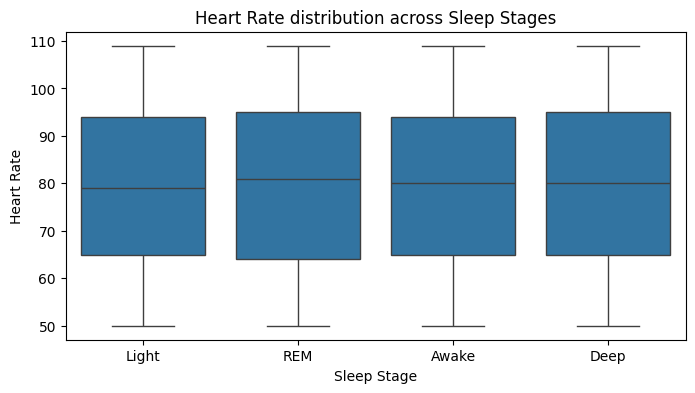

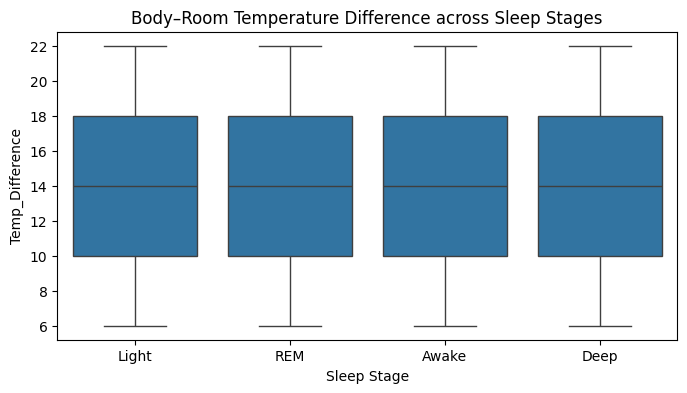

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Feature Engineering ----
df["HR_Deviation"] = df["Heart Rate"] - df["Heart Rate"].mean()
df["Temp_Difference"] = df["Body Temperature"] - df["Room Temperature"]

# ---- Quick sanity check ----
print(df[["HR_Deviation", "Temp_Difference"]].describe())

# ---- Visual check: Heart Rate vs Sleep Stage ----
plt.figure(figsize=(8, 4))
sns.boxplot(x="Sleep Stage", y="Heart Rate", data=df)
plt.title("Heart Rate distribution across Sleep Stages")
plt.show()

# ---- Visual check: Temp Difference vs Sleep Stage ----
plt.figure(figsize=(8, 4))
sns.boxplot(x="Sleep Stage", y="Temp_Difference", data=df)
plt.title("Body–Room Temperature Difference across Sleep Stages")
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# ---- Feature set ----
X = df[
    [
        "Heart Rate",
        "Body Temperature",
        "Room Temperature",
        "Humidity",
        "HR_Deviation",
        "Temp_Difference"
    ]
]

# ---- Target ----
y = df["Sleep_Stage_Encoded"]

# ---- Stratified Train-Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

print("\nTraining label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


Training set shape: (4000, 6)
Test set shape: (1000, 6)

Training label distribution:
Sleep_Stage_Encoded
3    0.25825
0    0.25375
2    0.25050
1    0.23750
Name: proportion, dtype: float64

Test label distribution:
Sleep_Stage_Encoded
3    0.258
0    0.253
2    0.251
1    0.238
Name: proportion, dtype: float64


In [11]:
# Sort just in case
df = df.reset_index(drop=True)

# Rolling window size (e.g., last 5 records)
WINDOW = 5

# Rolling statistics for Heart Rate
df["HR_Mean_5"] = df["Heart Rate"].rolling(WINDOW).mean()
df["HR_Std_5"]  = df["Heart Rate"].rolling(WINDOW).std()

# Rolling statistics for Body Temperature
df["BT_Mean_5"] = df["Body Temperature"].rolling(WINDOW).mean()
df["BT_Std_5"]  = df["Body Temperature"].rolling(WINDOW).std()

# Drop rows with NaNs introduced by rolling
df = df.dropna().reset_index(drop=True)

print("New shape after rolling features:", df.shape)


New shape after rolling features: (4996, 12)


In [12]:
X = df[
    [
        "Heart Rate",
        "Body Temperature",
        "Room Temperature",
        "Humidity",
        "HR_Mean_5",
        "HR_Std_5",
        "BT_Mean_5",
        "BT_Std_5"
    ]
]

y = df["Sleep_Stage_Encoded"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Accuracy (with temporal features):")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Random Forest Accuracy (with temporal features):
0.235

Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.24      0.24       254
           1       0.22      0.19      0.21       238
           2       0.25      0.25      0.25       250
           3       0.23      0.25      0.24       258

    accuracy                           0.23      1000
   macro avg       0.23      0.23      0.23      1000
weighted avg       0.23      0.23      0.23      1000


Confusion Matrix:
[[62 55 62 75]
 [63 45 57 73]
 [65 51 63 71]
 [77 50 66 65]]


In [15]:
# ---- Create Sleep Quality Label ----
def label_sleep_quality(row):
    if (
        row["Heart Rate"] < 90 and
        35.5 <= row["Body Temperature"] <= 36.8 and
        30 <= row["Humidity"] <= 60 and
        abs(row["Temp_Difference"]) <= 15
    ):
        return 1   # Stable Sleep
    else:
        return 0   # Disturbed Sleep


df["Sleep_Quality_Label"] = df.apply(label_sleep_quality, axis=1)

# ---- Check distribution ----
print("Sleep Quality Label Distribution:")
print(df["Sleep_Quality_Label"].value_counts())

print("\nPercentage:")
print(df["Sleep_Quality_Label"].value_counts(normalize=True) * 100)


Sleep Quality Label Distribution:
Sleep_Quality_Label
0    4370
1     626
Name: count, dtype: int64

Percentage:
Sleep_Quality_Label
0    87.469976
1    12.530024
Name: proportion, dtype: float64


In [16]:
from sklearn.model_selection import train_test_split

# ---- Feature set for Sleep Quality ----
X = df[
    [
        "Heart Rate",
        "Body Temperature",
        "Room Temperature",
        "Humidity",
        "HR_Mean_5",
        "HR_Std_5",
        "BT_Mean_5",
        "BT_Std_5",
        "Temp_Difference"
    ]
]

# ---- Target ----
y = df["Sleep_Quality_Label"]

# ---- Stratified Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTraining label distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest label distribution:")
print(y_test.value_counts(normalize=True))


Training shape: (3996, 9)
Test shape: (1000, 9)

Training label distribution:
Sleep_Quality_Label
0    0.874625
1    0.125375
Name: proportion, dtype: float64

Test label distribution:
Sleep_Quality_Label
0    0.875
1    0.125
Name: proportion, dtype: float64


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Imbalance-aware Random Forest ----
rf_sleep = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    class_weight={0: 1, 1: 4},  # penalize missing Stable Sleep
    random_state=42,
    n_jobs=-1
)

rf_sleep.fit(X_train, y_train)

# ---- Predictions ----
y_pred = rf_sleep.predict(X_test)

# ---- Evaluation ----
print("Sleep Quality Model Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Disturbed", "Stable"]))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Sleep Quality Model Accuracy:
1.0

Classification Report:
              precision    recall  f1-score   support

   Disturbed       1.00      1.00      1.00       875
      Stable       1.00      1.00      1.00       125

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000


Confusion Matrix:
[[875   0]
 [  0 125]]


In [18]:
# ---- Leakage-free feature set ----
X = df[
    [
        "HR_Mean_5",
        "HR_Std_5",
        "BT_Mean_5",
        "BT_Std_5",
        "Temp_Difference"
    ]
]

y = df["Sleep_Quality_Label"]

# ---- Train-test split again ----
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))


Train distribution:
Sleep_Quality_Label
0    0.874625
1    0.125375
Name: proportion, dtype: float64

Test distribution:
Sleep_Quality_Label
0    0.875
1    0.125
Name: proportion, dtype: float64


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ---- Leakage-free Random Forest ----
rf_sleep_clean = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=5,
    class_weight={0: 1, 1: 4},  # still handle imbalance
    random_state=42,
    n_jobs=-1
)

rf_sleep_clean.fit(X_train, y_train)

# ---- Predictions ----
y_pred_clean = rf_sleep_clean.predict(X_test)

# ---- Evaluation ----
print("Leakage-free Sleep Quality Model Accuracy:")
print(accuracy_score(y_test, y_pred_clean))

print("\nClassification Report:")
print(classification_report(
    y_test,
    y_pred_clean,
    target_names=["Disturbed", "Stable"]
))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_clean))


Leakage-free Sleep Quality Model Accuracy:
0.86

Classification Report:
              precision    recall  f1-score   support

   Disturbed       0.89      0.96      0.92       875
      Stable       0.36      0.16      0.22       125

    accuracy                           0.86      1000
   macro avg       0.63      0.56      0.57      1000
weighted avg       0.82      0.86      0.84      1000


Confusion Matrix:
[[840  35]
 [105  20]]


In [23]:
# Predict probability of Stable Sleep
stable_prob = rf_sleep_clean.predict_proba(X_test)[:, 1]

# Attach to dataframe for analysis
results = X_test.copy()
results["True_Label"] = y_test.values
results["Stable_Sleep_Probability"] = stable_prob

print(results.head())


      HR_Mean_5   HR_Std_5  BT_Mean_5  BT_Std_5  Temp_Difference  True_Label  \
763        93.2  15.514509       36.0  0.707107               13           0   
95         72.2  16.269604       35.6  0.547723               13           0   
3794       90.6  17.558474       36.0  1.000000               10           0   
3108       70.6  20.007499       35.6  0.547723               10           0   
4290       90.0  16.926311       36.0  0.707107               14           0   

      Stable_Sleep_Probability  
763                   0.133622  
95                    0.631406  
3794                  0.028845  
3108                  0.148412  
4290                  0.138812  


In [24]:
# Sleep Quality Score (0–100)
results["Sleep_Quality_Score"] = (results["Stable_Sleep_Probability"] * 100).round(2)

print(results[["Sleep_Quality_Score"]].describe())


       Sleep_Quality_Score
count          1000.000000
mean             14.821160
std              17.560037
min               0.000000
25%               0.200000
50%               8.375000
75%              26.357500
max              83.030000


In [25]:
# Rolling trend over 7 days
results["Sleep_Quality_Trend_7"] = (
    results["Sleep_Quality_Score"]
    .rolling(window=7)
    .mean()
)

print(results[["Sleep_Quality_Trend_7"]].tail())


      Sleep_Quality_Trend_7
2347              16.124286
323               20.504286
3190              27.168571
4651              26.191429
3931              31.225714


In [26]:
def compute_rsi(row):
    score = row["Sleep_Quality_Score"]
    trend = row["Sleep_Quality_Trend_7"]

    if score < 30 and trend >= 0:
        return "Early Recovery"
    elif 30 <= score < 60 and trend >= 0:
        return "Stable Recovery"
    elif score >= 60 and trend < 0:
        return "Risk of Deterioration"
    elif score < 30 and trend < 0:
        return "High Risk"
    else:
        return "Monitoring"


results["RSI_Status"] = results.apply(compute_rsi, axis=1)

print(results["RSI_Status"].value_counts())


RSI_Status
Early Recovery     798
Stable Recovery    176
Monitoring          26
Name: count, dtype: int64


In [27]:
pip install torch


In [28]:
import torch

# What we want to save
model_bundle = {
    "model": rf_sleep_clean,   # your trained leakage-free model
    "features": X_train.columns.tolist(),
    "class_mapping": {
        0: "Disturbed Sleep",
        1: "Stable Sleep"
    }
}

# Save as .pth
torch.save(model_bundle, "sleep_quality_model.pth")

print("Model saved as sleep_quality_model.pth")


Model saved as sleep_quality_model.pth
